In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pwd = os.getcwd()
print(pwd)

c:\Users\Tohid\OneDrive - University at Buffalo\research_projects\HEA_composition_processing\parito_front_data


In [3]:
# Load the Excel file
file_path = pwd + '/processed_data/processed_data_selected_columns.xlsx'
data = pd.read_excel(file_path)

data = data.sample(frac=1, random_state=42).reset_index(drop=True) # bring randomness to the sorted data
# Display the first few rows of the dataset to understand its structure
data.head()

,Alloy_Formula_six_elements,Element_Concentration_Dict,PhaseType,TestTempC,Strain Rate (s-1),Arc Melting,HIP Time (h),Anneal Temp (degC),Anneal Time (h),Anneal Cooling Rate (degC/min),Initial condition,Tox,YieldStr(MPa),Ductility (%),Hardness (HV),oxidation
0,Al0.24Hf0.15Mo0.16Nb0.09Ta0.11Zr0.24,"{'Al': 0.24042912489943222, 'Hf': 0.1536041152...",BCC+M55i3,25,0.0010,1,4,1000,192,10.0,MA/SPS,1300,4679.1400,2.677051,362.07382,8.529744
1,Al0.21Cr0.17Nb0.13Ta0.13V0.21Zr0.14,"{'Al': 0.21130092661450187, 'Cr': 0.1725767366...",BCC+B2,400,0.0005,1,3,1200,1,10.0,As-cast,900,1383.0916,11.860468,196.34445,0.139556
2,Al0.17Mo0.12Nb0.25Ti0.11V0.11Zr0.25,"{'Al': 0.17389987596419076, 'Mo': 0.1195677997...",BCC+M5Si3,400,0.0010,1,4,800,2,15.0,Annealed,900,1681.1340,81.611770,232.05919,0.154893
3,Al0.2Cr0.17Nb0.12Ti0.15V0.22Zr0.14,"{'Al': 0.20240455867194326, 'Cr': 0.1705407519...",BCC+M55i3,600,0.0010,1,4,1300,192,4.2,Annealed,700,3684.7131,34.955803,323.57016,0.165539
4,Al0.21Cr0.23Hf0.07Mo0.17Ta0.18Zr0.13,"{'Al': 0.21265725404059307, 'Cr': 0.2346914129...",BCC+M55i3,600,0.0010,1,4,1500,192,4.2,As-cast,900,3969.0566,23.540775,343.08896,0.199225


In [4]:
data.columns

Index(['Alloy_Formula_six_elements', 'Element_Concentration_Dict', 'PhaseType',
       'TestTempC', 'Strain Rate (s-1)', 'Arc Melting', 'HIP Time (h)',
       'Anneal Temp (degC)', 'Anneal Time (h)',
       'Anneal Cooling Rate (degC/min)', 'Initial condition', 'Tox',
       'YieldStr(MPa)', 'Ductility (%)', 'Hardness (HV)', 'oxidation'],
      dtype='object')

In [5]:
data = data.drop(['Hardness (HV)', 'oxidation'], axis=1)

In [6]:
import ast

# Convert the string representation of dictionary to actual dictionary
data['Element_Concentration_Dict'] = data['Element_Concentration_Dict'].apply(ast.literal_eval)

# Identifying all unique elements across the dictionaries
unique_elements = set()
for element_dict in data['Element_Concentration_Dict']:
    unique_elements.update(element_dict.keys())

# Display the unique elements found
unique_elements

{'Al', 'Cr', 'Hf', 'Mo', 'Nb', 'Ta', 'Ti', 'V', 'Zr'}

In [7]:
# Correcting the population of mole fractions into the columns
for element in unique_elements:
    data[element] = data['Element_Concentration_Dict'].apply(lambda x: x.get(element, 0))

# Converting the set of unique elements to a list
unique_elements_list = list(unique_elements)

# Display the DataFrame using the list as the indexer
data[unique_elements_list].head()

,Zr,Nb,Ta,Mo,Ti,Cr,V,Hf,Al
0,0.241900,0.093071,0.110872,0.160123,0.000000,0.000000,0.000000,0.153604,0.240429
1,0.139605,0.133740,0.130397,0.000000,0.000000,0.172577,0.212379,0.000000,0.211301
2,0.248395,0.246338,0.000000,0.119568,0.105045,0.000000,0.106754,0.000000,0.173900
3,0.136850,0.118197,0.000000,0.000000,0.149279,0.170541,0.222728,0.000000,0.202405
4,0.130055,0.000000,0.183892,0.173625,0.000000,0.234691,0.000000,0.065079,0.212657


In [8]:
data.head()

,Alloy_Formula_six_elements,Element_Concentration_Dict,PhaseType,TestTempC,Strain Rate (s-1),Arc Melting,HIP Time (h),Anneal Temp (degC),Anneal Time (h),Anneal Cooling Rate (degC/min),...,Ductility (%),Zr,Nb,Ta,Mo,Ti,Cr,V,Hf,Al
0,Al0.24Hf0.15Mo0.16Nb0.09Ta0.11Zr0.24,"{'Al': 0.24042912489943222, 'Hf': 0.1536041152...",BCC+M55i3,25,0.0010,1,4,1000,192,10.0,...,2.677051,0.241900,0.093071,0.110872,0.160123,0.000000,0.000000,0.000000,0.153604,0.240429
1,Al0.21Cr0.17Nb0.13Ta0.13V0.21Zr0.14,"{'Al': 0.21130092661450187, 'Cr': 0.1725767366...",BCC+B2,400,0.0005,1,3,1200,1,10.0,...,11.860468,0.139605,0.133740,0.130397,0.000000,0.000000,0.172577,0.212379,0.000000,0.211301
2,Al0.17Mo0.12Nb0.25Ti0.11V0.11Zr0.25,"{'Al': 0.17389987596419076, 'Mo': 0.1195677997...",BCC+M5Si3,400,0.0010,1,4,800,2,15.0,...,81.611770,0.248395,0.246338,0.000000,0.119568,0.105045,0.000000,0.106754,0.000000,0.173900
3,Al0.2Cr0.17Nb0.12Ti0.15V0.22Zr0.14,"{'Al': 0.20240455867194326, 'Cr': 0.1705407519...",BCC+M55i3,600,0.0010,1,4,1300,192,4.2,...,34.955803,0.136850,0.118197,0.000000,0.000000,0.149279,0.170541,0.222728,0.000000,0.202405
4,Al0.21Cr0.23Hf0.07Mo0.17Ta0.18Zr0.13,"{'Al': 0.21265725404059307, 'Cr': 0.2346914129...",BCC+M55i3,600,0.0010,1,4,1500,192,4.2,...,23.540775,0.130055,0.000000,0.183892,0.173625,0.000000,0.234691,0.000000,0.065079,0.212657


In [9]:
np.unique(data["PhaseType"], return_counts=True)

(array(['2 BCC', '2 BCC+HCP', '2 BCC+Laves', '3 BCC', 'B2', 'BCC',
        'BCC+B2', 'BCC+HCP', 'BCC+Laves', 'BCC+Laves+M5Si3', 'BCC+M55i3',
        'BCC+M5Si3', 'BCC+laves+M5Si3'], dtype=object),
 array([ 5,  8, 11,  6, 18, 12, 12,  5, 18, 15, 30, 27, 45], dtype=int64))

In [10]:
np.unique(data["Initial condition"], return_counts=True)

(array(['Annealed', 'Annealed  ', 'As-cast', 'MA/SPS'], dtype=object),
 array([57, 65, 61, 29], dtype=int64))

In [11]:
data.PhaseType.value_counts()

BCC+laves+M5Si3    45
BCC+M55i3          30
BCC+M5Si3          27
B2                 18
BCC+Laves          18
BCC+Laves+M5Si3    15
BCC+B2             12
BCC                12
2 BCC+Laves        11
2 BCC+HCP           8
3 BCC               6
BCC+HCP             5
2 BCC               5
Name: PhaseType, dtype: int64

#### Label Encoding and One-Hot Encoding

In [12]:
"""# Applying Label Encoding and One-Hot Encoding
label_enc_phase = LabelEncoder()
label_enc_initial = LabelEncoder()
data['PhaseType_encoded'] = label_enc_phase.fit_transform(data['PhaseType'])
data['Initial_condition_encoded'] = label_enc_initial.fit_transform(data['Initial condition'])
data['PhaseType_encoded'] = data['PhaseType_encoded'].apply(lambda x: format(x, 'b').zfill(4))
data['Initial_condition_encoded'] = data['Initial_condition_encoded'].apply(lambda x: format(x, 'b').zfill(3))
arc_melting_one_hot = pd.get_dummies(data['Arc Melting'], prefix='Arc_Melting')
data_encoded = pd.concat([data, arc_melting_one_hot], axis=1)

data_encoded.head()"""

"# Applying Label Encoding and One-Hot Encoding\nlabel_enc_phase = LabelEncoder()\nlabel_enc_initial = LabelEncoder()\ndata['PhaseType_encoded'] = label_enc_phase.fit_transform(data['PhaseType'])\ndata['Initial_condition_encoded'] = label_enc_initial.fit_transform(data['Initial condition'])\ndata['PhaseType_encoded'] = data['PhaseType_encoded'].apply(lambda x: format(x, 'b').zfill(4))\ndata['Initial_condition_encoded'] = data['Initial_condition_encoded'].apply(lambda x: format(x, 'b').zfill(3))\narc_melting_one_hot = pd.get_dummies(data['Arc Melting'], prefix='Arc_Melting')\ndata_encoded = pd.concat([data, arc_melting_one_hot], axis=1)\n\ndata_encoded.head()"

#### Frequency encoding

In [13]:
# Calculate the frequency of each category in 'PhaseType' and 'Initial condition'
phase_type_freq = data['PhaseType'].value_counts(normalize=True)
initial_condition_freq = data['Initial condition'].value_counts(normalize=True)

# Replace the categorical values with their frequencies
data['PhaseType_freq_encoded'] = data['PhaseType'].map(phase_type_freq)
data['Initial_condition_freq_encoded'] = data['Initial condition'].map(initial_condition_freq)

# Display the first few rows of the updated DataFrame
data[['PhaseType', 'PhaseType_freq_encoded', 'Initial condition', 'Initial_condition_freq_encoded']].head()

data_encoded = data.copy()

In [14]:
#data_encoded.to_excel(pwd + "/parito_front_original_comp/data/parito_front_encoded.xlsx", index=False)

In [15]:
# Normalizing the features
properties = ['YieldStr(MPa)', 'Ductility (%)']
features = data_encoded.drop(["Alloy_Formula_six_elements", "Element_Concentration_Dict", 
                              "PhaseType", "Arc Melting", "Initial condition"] , axis=1)

features.head()

,TestTempC,Strain Rate (s-1),HIP Time (h),Anneal Temp (degC),Anneal Time (h),Anneal Cooling Rate (degC/min),Tox,YieldStr(MPa),Ductility (%),Zr,Nb,Ta,Mo,Ti,Cr,V,Hf,Al,PhaseType_freq_encoded,Initial_condition_freq_encoded
0,25,0.0010,4,1000,192,10.0,1300,4679.1400,2.677051,0.241900,0.093071,0.110872,0.160123,0.000000,0.000000,0.000000,0.153604,0.240429,0.141509,0.136792
1,400,0.0005,3,1200,1,10.0,900,1383.0916,11.860468,0.139605,0.133740,0.130397,0.000000,0.000000,0.172577,0.212379,0.000000,0.211301,0.056604,0.287736
2,400,0.0010,4,800,2,15.0,900,1681.1340,81.611770,0.248395,0.246338,0.000000,0.119568,0.105045,0.000000,0.106754,0.000000,0.173900,0.127358,0.268868
3,600,0.0010,4,1300,192,4.2,700,3684.7131,34.955803,0.136850,0.118197,0.000000,0.000000,0.149279,0.170541,0.222728,0.000000,0.202405,0.141509,0.268868
4,600,0.0010,4,1500,192,4.2,900,3969.0566,23.540775,0.130055,0.000000,0.183892,0.173625,0.000000,0.234691,0.000000,0.065079,0.212657,0.141509,0.287736


In [16]:
# Reordering the dataframe so that properties are the last columns
non_property_columns = [col for col in features.columns if col not in properties]
reordered_columns = non_property_columns + properties
reordered_features = features[reordered_columns]

features = reordered_features.copy()

features.head()

,TestTempC,Strain Rate (s-1),HIP Time (h),Anneal Temp (degC),Anneal Time (h),Anneal Cooling Rate (degC/min),Tox,Zr,Nb,Ta,Mo,Ti,Cr,V,Hf,Al,PhaseType_freq_encoded,Initial_condition_freq_encoded,YieldStr(MPa),Ductility (%)
0,25,0.0010,4,1000,192,10.0,1300,0.241900,0.093071,0.110872,0.160123,0.000000,0.000000,0.000000,0.153604,0.240429,0.141509,0.136792,4679.1400,2.677051
1,400,0.0005,3,1200,1,10.0,900,0.139605,0.133740,0.130397,0.000000,0.000000,0.172577,0.212379,0.000000,0.211301,0.056604,0.287736,1383.0916,11.860468
2,400,0.0010,4,800,2,15.0,900,0.248395,0.246338,0.000000,0.119568,0.105045,0.000000,0.106754,0.000000,0.173900,0.127358,0.268868,1681.1340,81.611770
3,600,0.0010,4,1300,192,4.2,700,0.136850,0.118197,0.000000,0.000000,0.149279,0.170541,0.222728,0.000000,0.202405,0.141509,0.268868,3684.7131,34.955803
4,600,0.0010,4,1500,192,4.2,900,0.130055,0.000000,0.183892,0.173625,0.000000,0.234691,0.000000,0.065079,0.212657,0.141509,0.287736,3969.0566,23.540775


In [17]:
elements = set(unique_elements)

# Reordering the dataframe so that properties are the last columns
non_elemental_columns = [col for col in features.columns if col not in elements]
elemental_columns = [col for col in features.columns if col in elements]
reordered_columns = elemental_columns + non_elemental_columns
reordered_features = features[reordered_columns]

features = reordered_features.copy()
features.head()

,Zr,Nb,Ta,Mo,Ti,Cr,V,Hf,Al,TestTempC,Strain Rate (s-1),HIP Time (h),Anneal Temp (degC),Anneal Time (h),Anneal Cooling Rate (degC/min),Tox,PhaseType_freq_encoded,Initial_condition_freq_encoded,YieldStr(MPa),Ductility (%)
0,0.241900,0.093071,0.110872,0.160123,0.000000,0.000000,0.000000,0.153604,0.240429,25,0.0010,4,1000,192,10.0,1300,0.141509,0.136792,4679.1400,2.677051
1,0.139605,0.133740,0.130397,0.000000,0.000000,0.172577,0.212379,0.000000,0.211301,400,0.0005,3,1200,1,10.0,900,0.056604,0.287736,1383.0916,11.860468
2,0.248395,0.246338,0.000000,0.119568,0.105045,0.000000,0.106754,0.000000,0.173900,400,0.0010,4,800,2,15.0,900,0.127358,0.268868,1681.1340,81.611770
3,0.136850,0.118197,0.000000,0.000000,0.149279,0.170541,0.222728,0.000000,0.202405,600,0.0010,4,1300,192,4.2,700,0.141509,0.268868,3684.7131,34.955803
4,0.130055,0.000000,0.183892,0.173625,0.000000,0.234691,0.000000,0.065079,0.212657,600,0.0010,4,1500,192,4.2,900,0.141509,0.287736,3969.0566,23.540775


In [18]:
features.columns

Index(['Zr', 'Nb', 'Ta', 'Mo', 'Ti', 'Cr', 'V', 'Hf', 'Al', 'TestTempC',
       'Strain Rate (s-1)', 'HIP Time (h)', 'Anneal Temp (degC)',
       'Anneal Time (h)', 'Anneal Cooling Rate (degC/min)', 'Tox',
       'PhaseType_freq_encoded', 'Initial_condition_freq_encoded',
       'YieldStr(MPa)', 'Ductility (%)'],
      dtype='object')

In [19]:
# Normalizing the features
#scaler = StandardScaler()
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

# Displaying the first few rows of the normalized features
#pd.DataFrame(features_normalized, columns=features.columns).to_excel(pwd+"/features_normalized.xlsx", index=False)
pd.DataFrame(features_normalized, columns=features.columns).head()

,Zr,Nb,Ta,Mo,Ti,Cr,V,Hf,Al,TestTempC,Strain Rate (s-1),HIP Time (h),Anneal Temp (degC),Anneal Time (h),Anneal Cooling Rate (degC/min),Tox,PhaseType_freq_encoded,Initial_condition_freq_encoded,YieldStr(MPa),Ductility (%)
0,0.738398,0.275663,0.399197,0.452113,0.000000,0.000000,0.000000,0.495874,0.826195,0.000000,1.000000,1.00,0.549296,1.000000,0.367089,1.000000,0.625,0.000000,0.760504,0.013065
1,0.426145,0.396118,0.469497,0.000000,0.000000,0.578302,0.677243,0.000000,0.726101,0.652174,0.285714,0.75,0.661972,0.005208,0.367089,0.333333,0.175,0.888889,0.122607,0.080857
2,0.758225,0.729614,0.000000,0.337604,0.256844,0.000000,0.340422,0.000000,0.597578,0.652174,1.000000,1.00,0.436620,0.010417,0.683544,0.333333,0.550,0.777778,0.180288,0.595768
3,0.417735,0.350082,0.000000,0.000000,0.364998,0.571480,0.710245,0.000000,0.695530,1.000000,1.000000,1.00,0.718310,1.000000,0.000000,0.000000,0.625,0.777778,0.568048,0.251349
4,0.396992,0.000000,0.662106,0.490237,0.000000,0.786448,0.000000,0.210091,0.730762,1.000000,1.000000,1.00,0.830986,1.000000,0.000000,0.333333,0.625,0.888889,0.623078,0.167083


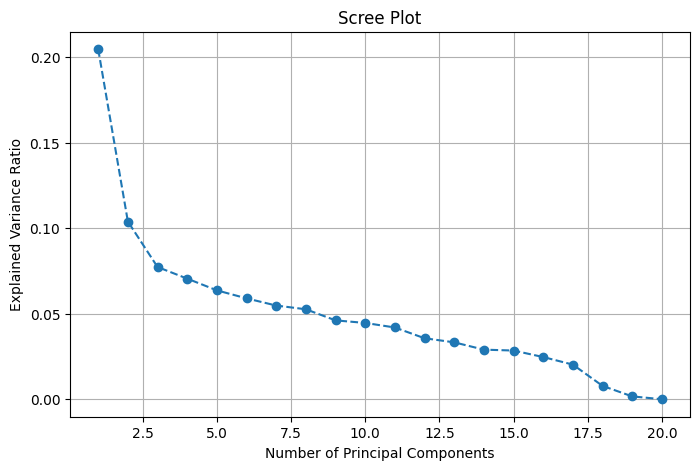

In [20]:
# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(features_normalized)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Creating a scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [21]:
explained_variance.cumsum()  # Cumulative explained variance for each number of components

array([0.20470336, 0.30862427, 0.38594878, 0.45647986, 0.52015299,
       0.57913864, 0.63392428, 0.68653329, 0.7326504 , 0.77726859,
       0.8192212 , 0.85488505, 0.88815816, 0.91715213, 0.94562241,
       0.97029206, 0.99053804, 0.99834588, 1.        , 1.        ])

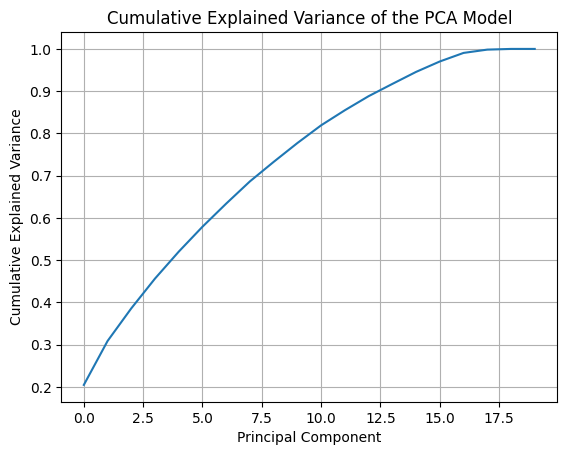

In [22]:
# Your data
cumulative_explained_variance = explained_variance.cumsum()

# Create the plot
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance of the PCA Model")
plt.grid(True)
plt.show()

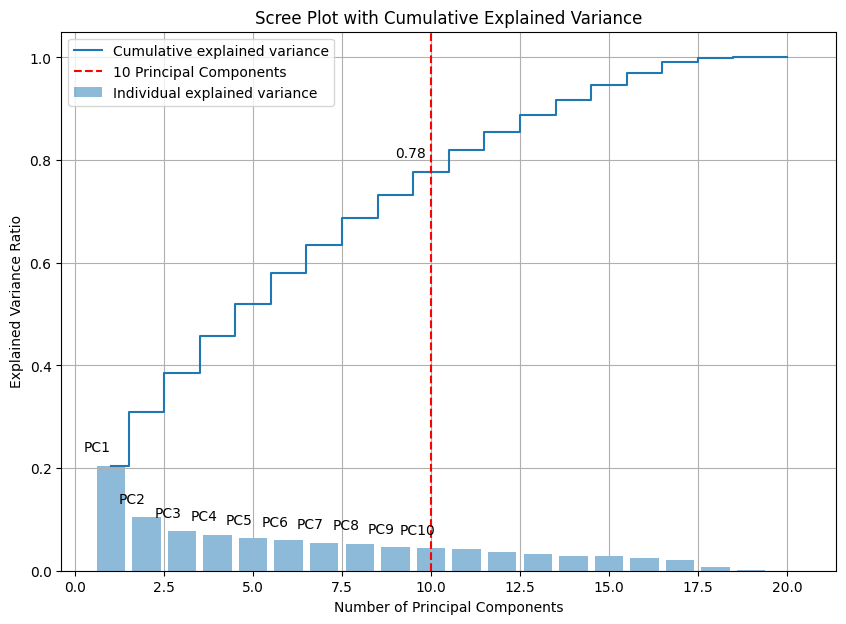

In [23]:
# Creating a scree plot with both the individual and cumulative explained variance
plt.figure(figsize=(10, 7))

# Individual explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')

# Cumulative explained variance
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Cumulative explained variance')

# Highlighting the first 10 principal components
plt.axvline(x=10, color='red', linestyle='--', label='10 Principal Components')

# Annotations for the first 10 PCs
for i in range(10):
    plt.annotate(f"PC{i+1}", (i + 1, explained_variance[i]), textcoords="offset points", xytext=(-10,10), ha='center')

# Adding the cumulative variance at PC10
plt.annotate(f"{cumulative_explained_variance[9]:.2f}", (10, cumulative_explained_variance[9]), 
             textcoords="offset points", xytext=(-15,10), ha='center')

plt.title('Scree Plot with Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [24]:
# Selecting 10 principal components for the final analysis
pca_10 = PCA(n_components=10, random_state=42)
principal_components_10 = pca_10.fit_transform(features_normalized)

# Explained variance of the selected 10 components
explained_variance_10 = pca_10.explained_variance_ratio_

# Cumulative explained variance for the selected 10 components
cumulative_explained_variance_10 = explained_variance_10.cumsum()

# Displaying the explained variance and cumulative explained variance for 10 components
explained_variance_10, cumulative_explained_variance_10

(array([0.20470336, 0.10392091, 0.07732452, 0.07053108, 0.06367312,
        0.05898565, 0.05478565, 0.05260901, 0.04611711, 0.04461818]),
 array([0.20470336, 0.30862427, 0.38594878, 0.45647986, 0.52015299,
        0.57913864, 0.63392428, 0.68653329, 0.7326504 , 0.77726859]))

In [25]:
# Create a DataFrame with the 10 principal components
df_principal_components = pd.DataFrame(principal_components_10, columns=[f'PC{i+1}' for i in range(10)])
#df_principal_components.to_excel(pwd+"/PCA/principal_components.xlsx", index=False)

df_principal_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.794660,0.407399,0.035013,0.910352,0.150426,0.156253,0.846312,-0.125120,-0.107412,-0.308898
1,-0.324741,-0.238058,0.421550,-0.250241,-0.085434,0.312268,-0.259039,0.054498,0.200304,-0.044151
2,-0.567037,0.105131,0.204598,0.390235,0.548914,0.135836,-0.250898,-0.443254,0.024519,-0.384818
3,0.219878,0.126492,-0.604438,-0.181222,-0.133095,0.790675,-0.479535,-0.278775,0.068593,-0.108460
4,0.366878,0.326795,-0.597398,-0.465494,0.081921,0.378782,0.245793,0.188291,-0.017362,-0.172426
...,...,...,...,...,...,...,...,...,...,...
207,0.044739,0.418241,0.547334,-0.171167,0.216681,-0.195591,-0.184035,0.036176,0.430042,-0.692334
208,1.035430,-0.656132,0.426089,-0.070387,0.239443,0.384811,-0.107475,0.274475,0.215322,-0.266827
209,0.315302,-0.634344,0.331835,0.337110,-0.109363,-0.724423,-0.187245,0.225124,0.035835,0.145094
210,-0.681136,0.440352,0.271162,0.137317,-0.109786,-0.063547,-0.029587,-0.682388,-0.368789,0.255108


In [26]:
#df_principal_components.to_excel(pwd + "/parito_front_original_comp/PCs/parito_front_10PCs.xlsx", index=False)

In [27]:
# Extracting coefficients for properties and features
num_features = len(features.columns) - len(properties)
properties_coeff = pca.components_[:2, num_features:].T
feature_coeff = pca.components_[:2, :num_features].T

# Feature labels and property labels
feature_labels = features.columns[:num_features]
property_labels = properties

In [28]:
feature_coeff.shape, properties_coeff.shape

((18, 2), (2, 2))

In [29]:
# Creating a DataFrame from the coefficients
df = pd.DataFrame(feature_coeff, index=feature_labels, columns=['PC1', 'PC2'])  # PC1, PC2 are example component names
df = pd.DataFrame(properties_coeff, index=property_labels, columns=['PC1', 'PC2'])  # PC1, PC2 are example component names

# Saving the DataFrame to an Excel file
#excel_file_path = pwd + '/PCA/feature_coefficients.xlsx'  # Specify your desired file path
#excel_file_path = pwd + '/PCA/property_coefficients.xlsx'  # Specify your desired file path
#df.to_excel(excel_file_path)

In [30]:
feature_coeff

array([[-0.04989991, -0.06182653],
       [-0.09966389, -0.0573246 ],
       [ 0.03478696,  0.09023843],
       [ 0.03772075,  0.07658162],
       [ 0.00783331, -0.0457311 ],
       [-0.00775046,  0.03410727],
       [ 0.0061592 , -0.01647569],
       [ 0.02365423, -0.05049397],
       [ 0.0578194 ,  0.05758078],
       [-0.41239531, -0.14690112],
       [ 0.01504295,  0.87597254],
       [ 0.11184715, -0.31467242],
       [ 0.22382341,  0.07560873],
       [ 0.65001338, -0.09328535],
       [ 0.09111529, -0.15725632],
       [-0.00435718,  0.11348956],
       [-0.2507221 ,  0.07696565],
       [ 0.01682542, -0.02086291]])

In [31]:
principal_components[:, 0:2].shape

(212, 2)

In [32]:
"""# Function to create a biplot for PC1 and PC2, with properties in a different color
def biplot_with_properties(score, coeff, properties_coeff, feature_labels, property_labels):
    xs = score[:, 0]
    ys = score[:, 1]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    # Scatter plot for the observations
    plt.scatter(xs * scalex, ys * scaley, s=5)

    # Arrows and labels for features
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if feature_labels is not None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_labels[i], color='g', ha='center', va='center')

    # Arrows and labels for properties
    for i in range(len(property_labels)):
        plt.arrow(0, 0, properties_coeff[i, 0], properties_coeff[i, 1], color='b', alpha=0.5)
        plt.text(properties_coeff[i, 0] * 1.15, properties_coeff[i, 1] * 1.15, property_labels[i], color='b', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

# Plotting the biplot with different colors for properties
plt.figure(figsize=(11, 8))
biplot_with_properties(principal_components[:, 0:2], feature_coeff, properties_coeff, feature_labels, property_labels)
plt.show()"""

'# Function to create a biplot for PC1 and PC2, with properties in a different color\ndef biplot_with_properties(score, coeff, properties_coeff, feature_labels, property_labels):\n    xs = score[:, 0]\n    ys = score[:, 1]\n    scalex = 1.0 / (xs.max() - xs.min())\n    scaley = 1.0 / (ys.max() - ys.min())\n\n    # Scatter plot for the observations\n    plt.scatter(xs * scalex, ys * scaley, s=5)\n\n    # Arrows and labels for features\n    for i in range(coeff.shape[0]):\n        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color=\'r\', alpha=0.5)\n        if feature_labels is not None:\n            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_labels[i], color=\'g\', ha=\'center\', va=\'center\')\n\n    # Arrows and labels for properties\n    for i in range(len(property_labels)):\n        plt.arrow(0, 0, properties_coeff[i, 0], properties_coeff[i, 1], color=\'b\', alpha=0.5)\n        plt.text(properties_coeff[i, 0] * 1.15, properties_coeff[i, 1] * 1.15, property_labels[i], colo

In [39]:
# Calculating correlation coefficients between each feature and property
# by taking the cosine of the angle between their vectors. This is proportional to the dot product.
correlations = np.dot(feature_coeff, properties_coeff.T)

# Create a DataFrame for better readability
correlation_df = pd.DataFrame(correlations, index=feature_labels, columns=property_labels)

# Save the correlation_df file for future use
#correlation_df.to_excel(pwd + "/PCA_results/correlation_df.xlsx", index=True, index_label="Feature")

correlation_df

,YieldStr(MPa),Ductility (%)
Zr,-0.019235,0.022256
Nb,-0.040800,0.034665
Ta,0.011713,-0.022488
Mo,0.013466,-0.021239
Ti,0.005015,0.004707
Cr,-0.004561,-0.003009
V,0.003242,0.000819
Hf,0.011991,0.001255
Al,0.022794,-0.023709
TestTempC,-0.172075,0.130080


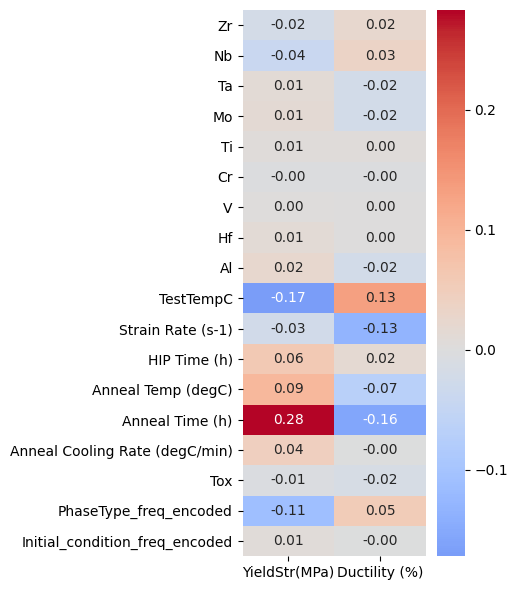

In [34]:
# Set the size of the heatmap for better readability
plt.figure(figsize=(5.0, 6))

# Create a heatmap to visualize the correlation matrix
ax = sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, fmt=".2f")

# Set titles and labels
#plt.title('Correlations between Processing Conditions and Properties')
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping

# Show the heatmap
#plt.savefig(pwd+"/pca_figures/parito_front_corr_features_property.png", dpi=1000, bbox_inches='tight')
plt.show()

In [35]:
"""from itertools import combinations


# Modified function to create a biplot for given principal components
def biplot_with_properties(score, coeff, properties_coeff, feature_labels, property_labels, pc1, pc2, ax):
    xs = score[:, pc1]
    ys = score[:, pc2]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    # Scatter plot for the observations
    ax.scatter(xs * scalex, ys * scaley, s=5)

    # Arrows and labels for features
    for i in range(coeff.shape[0]):
        ax.arrow(0, 0, coeff[i, pc1], coeff[i, pc2], color='r', alpha=0.5)
        if feature_labels is not None:
            ax.text(coeff[i, pc1] * 1.15, coeff[i, pc2] * 1.15, feature_labels[i], color='g', ha='center', va='center')

    # Arrows and labels for properties
    for i in range(len(property_labels)):
        ax.arrow(0, 0, properties_coeff[i, pc1], properties_coeff[i, pc2], color='b', alpha=0.5)
        ax.text(properties_coeff[i, pc1] * 1.15, properties_coeff[i, pc2] * 1.15, property_labels[i], color='b', ha='center', va='center')

    ax.set_xlabel(f"PC{pc1+1}")
    ax.set_ylabel(f"PC{pc2+1}")
    ax.grid()

# Extracting coefficients for properties and features
num_features = len(features.columns) - len(properties)
properties_coeff = pca.components_[:, num_features:].T
feature_coeff = pca.components_[:, :num_features].T

# Feature labels and property labels
feature_labels = features.columns[:num_features]
property_labels = properties

# Plotting the biplots for different combinations of PCs
plt.figure(figsize=(20, 16))
pc_combinations = list(combinations(range(5), 2))  # Combinations of 5 PCs taken 2 at a time

for i, (pc1, pc2) in enumerate(pc_combinations):
    ax = plt.subplot(3, 4, i+1)
    biplot_with_properties(principal_components, feature_coeff, properties_coeff, feature_labels, property_labels, pc1, pc2, ax)

plt.tight_layout(pad=0)
plt.show()"""

'from itertools import combinations\n\n\n# Modified function to create a biplot for given principal components\ndef biplot_with_properties(score, coeff, properties_coeff, feature_labels, property_labels, pc1, pc2, ax):\n    xs = score[:, pc1]\n    ys = score[:, pc2]\n    scalex = 1.0 / (xs.max() - xs.min())\n    scaley = 1.0 / (ys.max() - ys.min())\n\n    # Scatter plot for the observations\n    ax.scatter(xs * scalex, ys * scaley, s=5)\n\n    # Arrows and labels for features\n    for i in range(coeff.shape[0]):\n        ax.arrow(0, 0, coeff[i, pc1], coeff[i, pc2], color=\'r\', alpha=0.5)\n        if feature_labels is not None:\n            ax.text(coeff[i, pc1] * 1.15, coeff[i, pc2] * 1.15, feature_labels[i], color=\'g\', ha=\'center\', va=\'center\')\n\n    # Arrows and labels for properties\n    for i in range(len(property_labels)):\n        ax.arrow(0, 0, properties_coeff[i, pc1], properties_coeff[i, pc2], color=\'b\', alpha=0.5)\n        ax.text(properties_coeff[i, pc1] * 1.15, pr

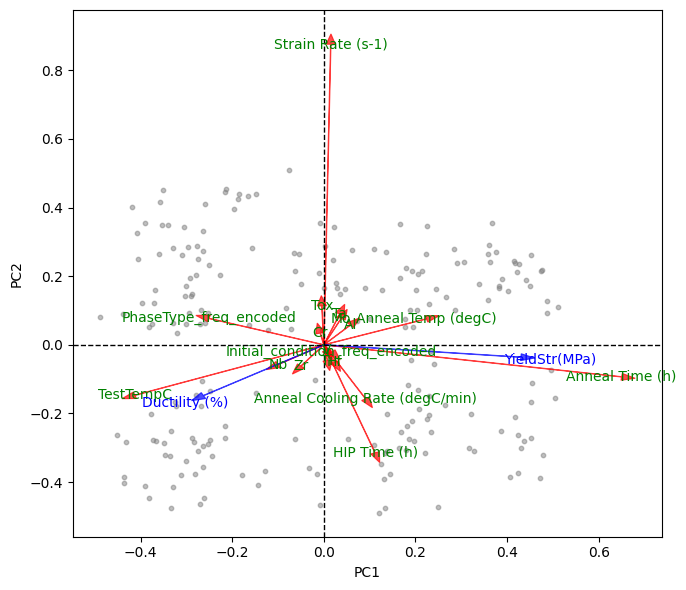

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def enhanced_biplot(score, coeff, properties_coeff, feature_labels, property_labels):
    xs = score[:, 0]
    ys = score[:, 1]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.scatter(xs * scalex, ys * scaley, s=10, marker='o', alpha=0.5, color='gray')

    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.7, head_width=0.02, head_length=0.03, linewidth=0.8)
        plt.text(coeff[i, 0] * 1.00, coeff[i, 1] * 1.00, feature_labels[i], color='g', ha='center', va='center')

    for i in range(len(property_labels)):
        plt.arrow(0, 0, properties_coeff[i, 0], properties_coeff[i, 1], color='b', alpha=0.7, head_width=0.02, head_length=0.03, linewidth=0.8)
        plt.text(properties_coeff[i, 0] * 1.15, properties_coeff[i, 1] * 1.15, property_labels[i], color='b', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    #plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%) explained variance")
    #plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%) explained variance")

    # Custom X and Y axes with dotted lines and arrows
    plt.axhline(y=0, color='k', linestyle='--', linewidth=1.0)
    plt.axvline(x=0, color='k', linestyle='--', linewidth=1.0)
    #plt.arrow(0, ys.min() * scaley, 0, ys.max() * scaley - ys.min() * scaley, head_width=0.03, head_length=0.05, fc='k', ec='k', linewidth=0.5)
    #plt.arrow(xs.min() * scalex, 0, xs.max() * scalex - xs.min() * scalex, 0, head_width=0.03, head_length=0.05, fc='k', ec='k', linewidth=0.5)
    
    
    """x_ticks = np.arange(-0.6, 0.8, 0.1)
    y_ticks = np.arange(-0.6, 0.9, 0.05)
    
    for x in x_ticks:
        plt.axvline(x=x, color='gray', linestyle=':', lw=0.5, alpha=0.5)
        
    for y in y_ticks:
        plt.axhline(y=y, color='gray', linestyle=':', lw=0.5, alpha=0.5)"""
        

    plt.tight_layout()
    plt.grid(False)
    #plt.legend()
    #plt.savefig(pwd+"/pca_figures/parito_front_pc1pc2_biplot.png", dpi=1000, bbox_inches='tight')
    plt.show()

#plt.style.use('fast')
plt.figure(figsize=(7, 6))
enhanced_biplot(principal_components[:, 0:2], feature_coeff, properties_coeff, feature_labels, property_labels)